<a href="https://colab.research.google.com/github/MiliWerneck/Python_CEFET/blob/main/trabalhoIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('generatedBy_react-csv.csv', delimiter=';')

# filtro = (df['Hora (UTC)'] > 1000) & (df['Hora (UTC)'] < 2200) & (df.Data < '10/09/2023')
filtro = (df['Hora (UTC)'] == 1200)
df = df[filtro]

# df_select = df[["Data", "Radiacao (KJ/m²)"]]
# df_select = df[["Data", "Temp. Max. (C)", "Temp. Min. (C)"]]
df_select = df[["Data", "Temp. Max. (C)"]]
df_select.Data = pd.to_datetime(df_select.Data, format='%d/%m/%Y')
df_select.set_index('Data', inplace=True)

# df_select = df_select.rename(columns={'Radiacao (KJ/m²)': 'Radiacao'})

df_select = df_select.rename(columns={'Temp. Max. (C)': 'Tempmax'})
df_select['Tempmax'] = df_select['Tempmax'].str.replace(',', '.')
df_select['Tempmax'] = df_select['Tempmax'].astype(float)

# df_select = df_select.rename(columns={'Temp. Min. (C)': 'Tempmin'})
# df_select['Tempmin'] = df_select['Tempmin'].str.replace(',', '.')
# df_select['Tempmin'] = df_select['Tempmin'].astype(float)

# df_select.info()
df_select

<ipython-input-13-c472d3cde089>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.Data = pd.to_datetime(df_select.Data, format='%d/%m/%Y')


,Tempmax
Data,
2023-03-01,26.0
2023-03-02,25.3
2023-03-03,27.0
2023-03-04,25.8
2023-03-05,24.2
...,...
2023-08-28,17.2
2023-08-29,20.5
2023-08-30,19.9


<Axes: xlabel='Data'>

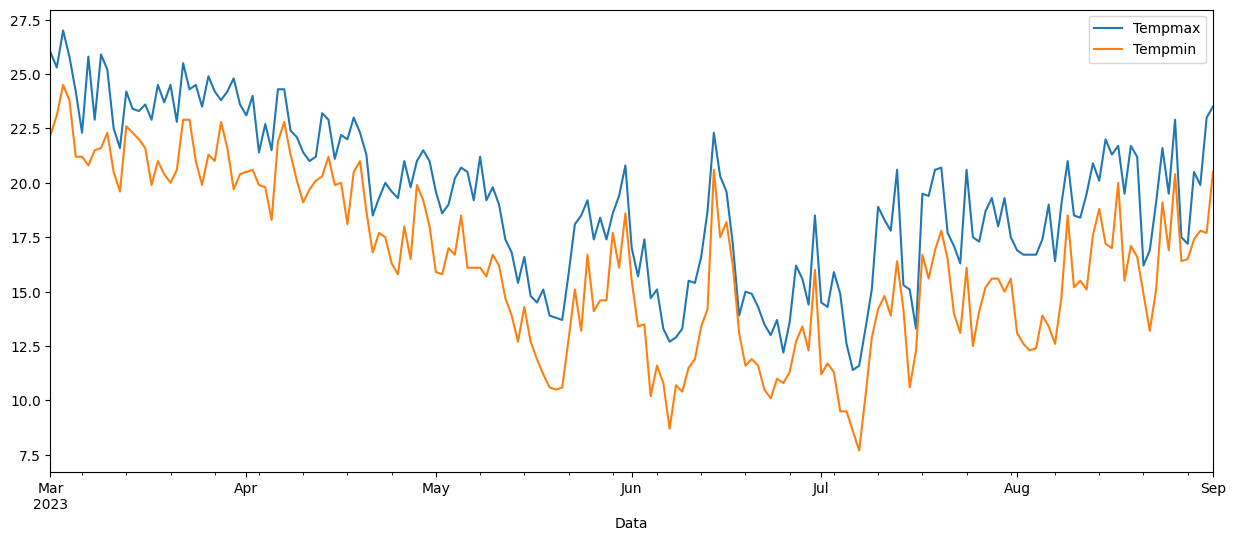

In [ ]:
df_select.plot(figsize=(15,6))

<Axes: xlabel='Data'>

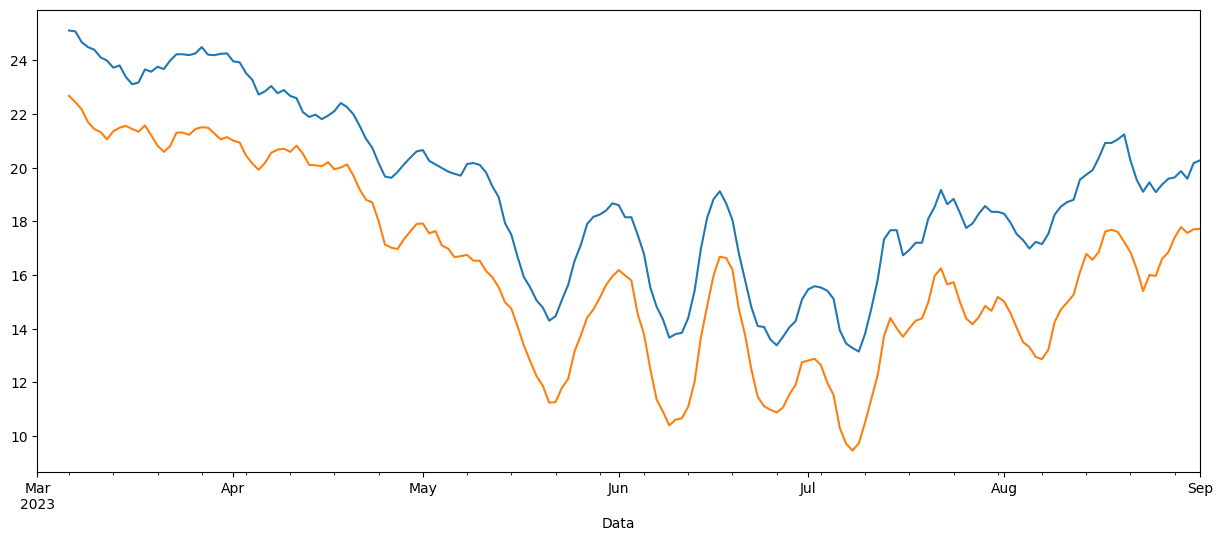

In [ ]:
# aplicando media movel em um periodo de 6 meses
df_select.Tempmax.rolling(6).mean().plot(figsize=(15,6))
df_select.Tempmin.rolling(6).mean().plot(figsize=(15,6))

<Axes: xlabel='Data'>

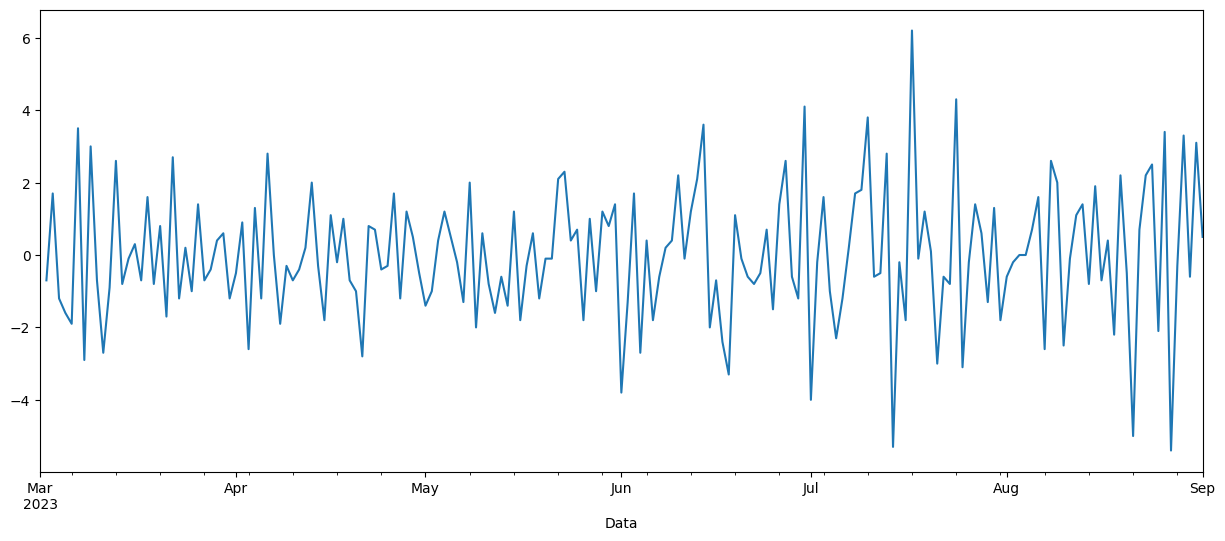

In [ ]:
# analizando sazonalidade, tentando fazer um equilibrio
# aplicando diferencas sucessivas
# delta Z(t) = Z(t) - Z(t-1)
df_select.Tempmax.diff().plot(figsize=(15,6))

<Axes: xlabel='Data'>

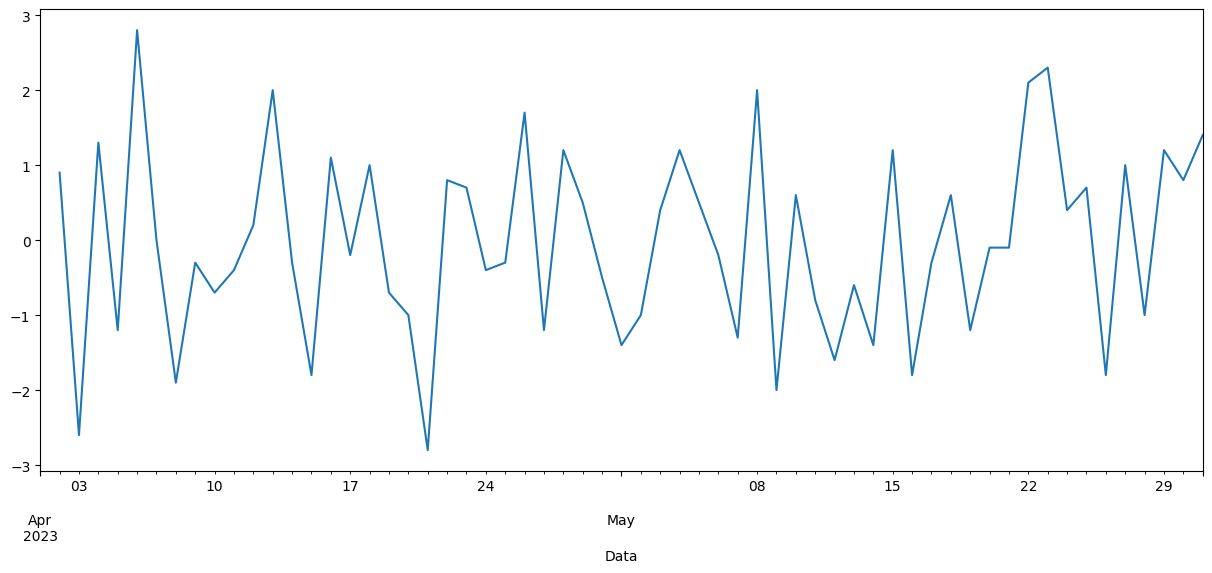

In [ ]:
# analize de sazonalidade mensal
# df_select.Tempmax.diff().groupby(df_select.index.month).mean().plot(kind='bar', figsize=(12,6))

filtro_mensal = (df_select.index.month >= 4) & (df_select.index.month <= 5)
df_select[filtro_mensal].Tempmax.diff().plot(figsize=(15,6))

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
previsao_3 = AutoReg(df_select.Tempmax, lags=7).fit()
#((previsao_3.resid))
#((previsao_3.resid)**2)
((previsao_3.resid)**2).mean()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2.7792954169430795

<Axes: >

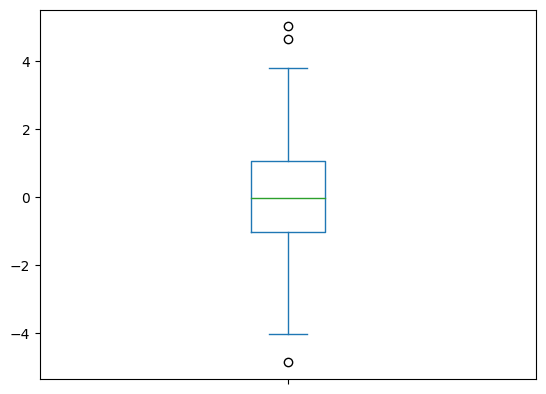

In [ ]:
previsao_3.resid.plot(kind='box')

<Axes: >

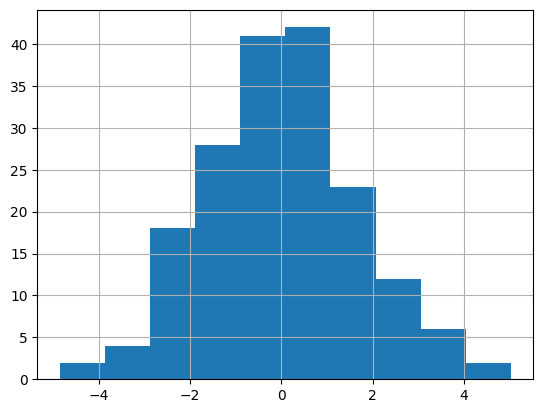

In [ ]:
previsao_3.resid.hist()

<Axes: xlabel='Data'>

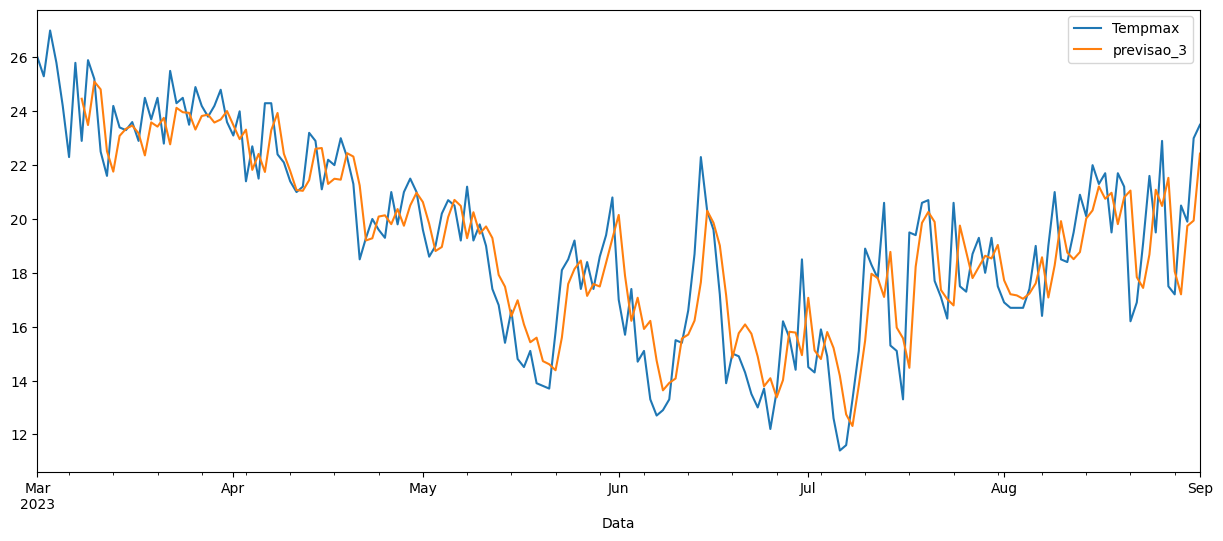

In [ ]:
df_select['previsao_3'] = previsao_3.predict()
df_select.plot(figsize=(15,6))

In [ ]:
previsao_3.predict(start='2023-09-02', end='2023-09-02')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2023-09-02    22.730899
Freq: D, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


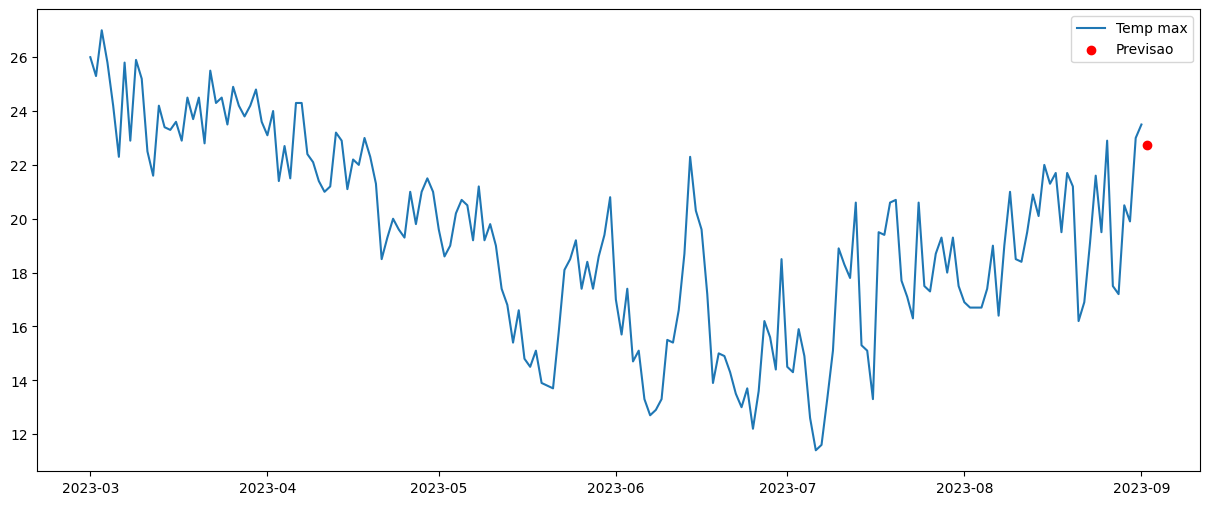

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df_select.Tempmax)
forecast = previsao_3.predict(start='2023-09-02', end='2023-09-02')
plt.scatter(forecast.index, forecast.values, color='red')
plt.legend(['Temp max', 'Previsao'])